In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import csv

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
file2 = "result/merge_for_regression_all_data.csv"

df = pd.read_csv(file2, header=None)
# print(df)

csvreader = csv.reader(open(file2))

x = []
y = []
line_len = 0

for line in csvreader:
    line_len = len(line)
    x_i = [line[i] for i in range(2,line_len)]
    y_i = float(line[line_len-1])
    x.append(x_i)
    y.append(y_i)
    
X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

for i in range(0, line_len-2):
    globals()['beta_{}'.format(i)] = lrmodel.coef_[i]
    if i == line_len-2:
        globals()['beta_{}'.format(i)] = lrmoder.intercept_

for line in df.loc():
    temp = 0
    for i in range(0,line_len-2):
#         print(line[i+2])
        temp = (float(line[i+2]) * float(globals()['beta_{}'.format(i)])) + temp
    temp = temp + float(globals()['beta_{}'.format(line_len-3)])
    print(line[len(line)-1]-temp)
        
for i in range(0, line_len-2):
    print(globals()['beta_{}'.format(i)])   

In [69]:
file3 = "data_for_linear/소득대비 미충족의료율.csv"

df = pd.read_csv(file3, header=None)
# print(df)

csvreader = csv.reader(open(file3))

x = []
y = []
line_len = 0

for line in csvreader:
    line_len = len(line)
    x_i = [line[i] for i in range(2,line_len)]
    y_i = float(line[line_len-1])
    x.append(x_i)
    y.append(y_i)
    
X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

for i in range(0, line_len-2):
    globals()['beta_{}'.format(i)] = lrmodel.coef_[i]
    if i == line_len-2:
        globals()['beta_{}'.format(i)] = lrmoder.intercept_

# for line in df.iloc():
#     temp = 0
#     for i in range(0,line_len-2):
# #         print(line[i+2])
#         temp = (float(line[i+2]) * float(globals()['beta_{}'.format(i)])) + temp
#     temp = temp + float(globals()['beta_{}'.format(line_len-3)])
# #     print(line[len(line)-1]-temp)
dashline_num = 45
print("="*dashline_num)        
print_count = 0
for i in range(0, line_len-2):
    if print_count == line_len-3:
        print(print('Y : ', globals()['beta_{}'.format(i)]))
    else:
        print('beta {} : '.format(i), globals()['beta_{}'.format(i)])
    print_count += 1
print("="*dashline_num)
prediction = lrmodel.predict(X)

print("residuals")
print("-"*dashline_num)
residuals = Y - prediction
re_df = pd.DataFrame(residuals)
print(re_df.describe())
print("="*dashline_num)
SSE = (residuals**2).sum()
SST = ((Y-Y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print("R_squared : ", R_squared)

print("Score : ", lrmodel.score(X,Y))
print("Mean-Squared-Error : ", mean_squared_error(prediction, Y))
print("RMSE : ", mean_squared_error(prediction, Y)**0.5)
print("="*dashline_num)

beta 0 :  -3.8269395538618255e-20
beta 1 :  -2.2537527399890678e-14
beta 2 :  1.4432899320127035e-14
Y :  0.9999999999999999
None
residuals
---------------------------------------------
                  0
count  2.500000e+02
mean   9.370282e-17
std    1.039648e-15
min   -7.105427e-15
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    4.884981e-15
R_squared :  1.0
Score :  1.0
Mean-Squared-Error :  1.0853246941643834e-30
RMSE :  1.0417891793277484e-15


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


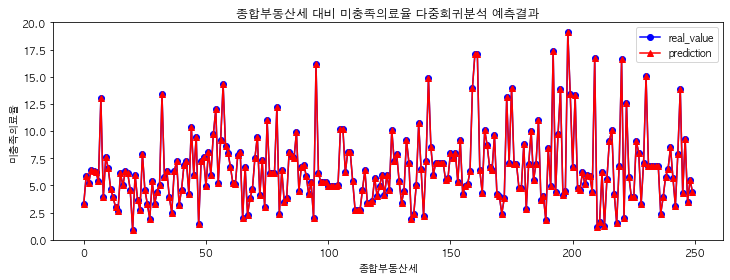

In [33]:
fig = plt.figure(figsize = (12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(df[[5]], marker='o', color='blue', label='real_value')
graph.plot(lrmodel.predict(X), marker='^', color='red', label='prediction')
graph.set_title("종합부동산세 대비 미충족의료율 다중회귀분석 예측결과")
plt.xlabel('종합부동산세')
plt.ylabel('미충족의료율')
plt.legend(loc ='best')

No handles with labels found to put in legend.


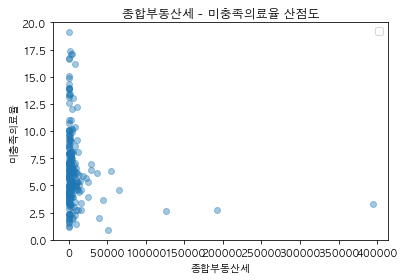

In [38]:
plt.scatter(df[2], df[5], alpha=0.4)
plt.title("종합부동산세 - 미충족의료율 산점도")
plt.xlabel('종합부동산세')
plt.ylabel('미충족의료율')
plt.legend(loc ='best')

No handles with labels found to put in legend.


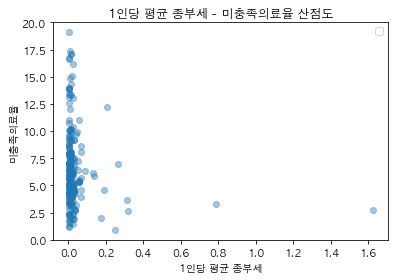

In [39]:
plt.scatter(df[3], df[5], alpha=0.4)
plt.title("1인당 평균 종부세 - 미충족의료율 산점도")
plt.xlabel('1인당 평균 종부세')
plt.ylabel('미충족의료율')
plt.legend(loc ='best')

No handles with labels found to put in legend.


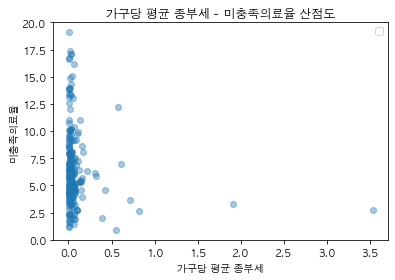

In [40]:
plt.scatter(df[4], df[5], alpha=0.4)
plt.title("가구당 평균 종부세 - 미충족의료율 산점도")
plt.xlabel('가구당 평균 종부세')
plt.ylabel('미충족의료율')
plt.legend(loc ='best')